# Independent Component Analysis (ICA)

**Content Creator**: Maria de Fátima Dias

It is an approach that finds the best linear transformation that maximizes the independence of the features, in a statistical point of view.

Suppose we have the input set of features $X = (x_1, x_2, ..., x_M)$ where $M$ is the number of features. The ICA applied a linear transformation to the data resulting into $Y = (y_1, y_2, ..., y_M)$ such that:

*   Maximization of the nongaussianity of the estimates.
*   The mutual information between $y_j$ and $y_i$, where $i\neq j$, is 0. 
*   The mutual information between $X$ and $Y$ is higher as posssible.



## Cocktail party problem

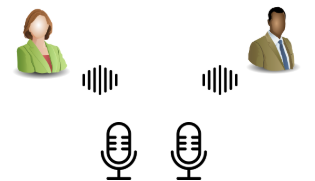

### Comparing two statiscally independent sources with an uniform distribution

For the sake of simplification we will analyse a problem in which two sources of signal, $s$, are being collected from two different microphones. The microphones captured signal is given by the equation:

> $X = As$

where $A$ represents each source weight for each microphone and has the following structure:
 
\begin{array}{|l|l|l|}
\hline
a11&a12 \\ \hline
a21&a22 \\ \hline
\end{array}
 
Below you can play with the weights that each microphone is capturing from each one of the sources, the weight $w_{ij}$ represents the $j$-th source weight on the $i$ microphone.

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets

def generate_random_distribution_sources(a11: float=2, a12: float=3, a21: float=4, a22: float=2):

  min_value = -5
  max_value = 5
  n_sources = 2
  number_samples = 2000

  sources = np.zeros((n_sources, number_samples))

  for source_i in range(n_sources):
    sources[source_i, :] = np.random.uniform(low=min_value, high=max_value, size=number_samples)

  transformation_matrix = np.asarray([[a11, a12],
                                      [a21, a22]])


  transformed_data = np.matmul(transformation_matrix, sources)
  
  f, ax = plt.subplots(1, 2, figsize=(25, 5))
  ax[0].plot(sources[0], sources[1], 'o')
  ax[1].plot(transformed_data[0], transformed_data[1], 'o')
  ax[0].set_title("Original distibution")
  ax[0].set_xlabel("Source 1")
  ax[0].set_xlabel("Source 2")
  ax[1].set_title("Captured distibution")
  ax[1].set_xlabel("Source 1")
  ax[1].set_xlabel("Source 2")
  return transformed_data, transformation_matrix

w = interactive(generate_random_distribution_sources, a11=(0.0,20.0,0.5), a12=(0.0,20.0,0.5), a21=(0.0,20.0,0.5), a22=(0.0,20.0,0.5))
display(w)

interactive(children=(FloatSlider(value=2.0, description='a11', max=20.0, step=0.5), FloatSlider(value=3.0, de…

#### FastICA

In the exercise below you can find an application of the FastICA algorithm to the capture distribution that you generated above.

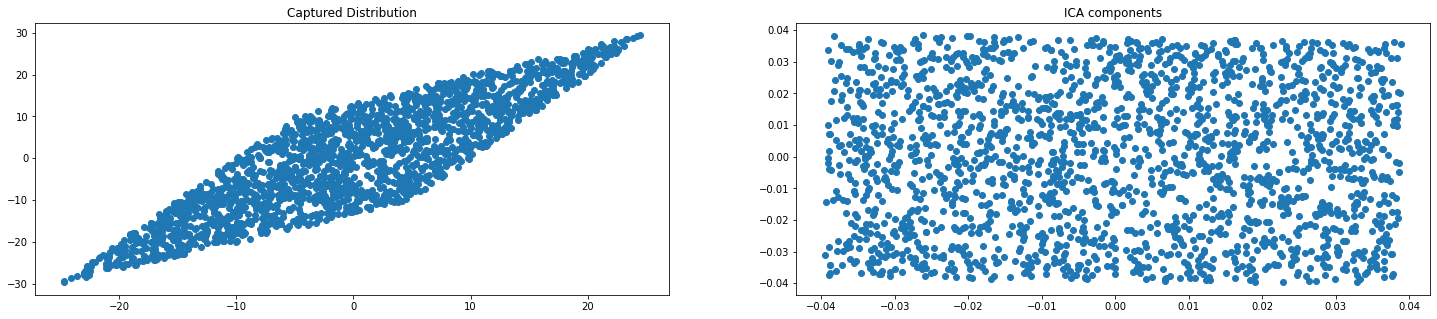

In [ ]:
#@title
from sklearn.decomposition import FastICA

X, A = w.result
ica_model = FastICA(n_components=2, random_state=0)
X_transformed = ica_model.fit_transform(X.T)
f, ax = plt.subplots(1, 2, figsize=(25, 5))
_ = ax[0].plot(X[0], X[1], 'o')
_ = ax[1].plot(X_transformed[:, 0], X_transformed[:, 1], 'o')
_ = ax[0].set_title("Captured Distribution")
_ = ax[1].set_title("ICA components")

##### Comparing the matrix A and W 

In [ ]:
#@title
print(f'A matrix:\n{A}, \n\nW matrix:\n{ica_model.mixing_}')

A matrix:
[[2. 3.]
 [4. 2.]], 

W matrix:
[[-268.38660076 -388.27353983]
 [-520.44636873 -255.87206745]]


### Another example

[Blind source separation model](https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html)

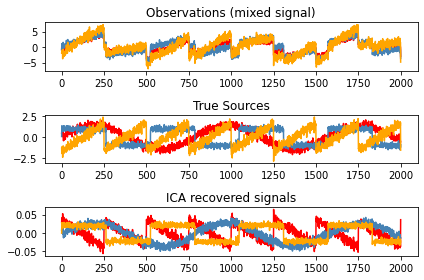

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()